#Maestría en Inteligencia Artificial Aplicada

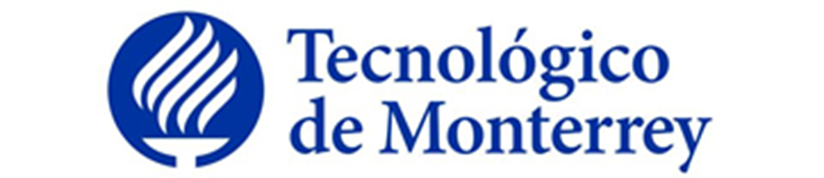

Ciencia y analítica de datos
Semana 3 - Actividad 1 Limpieza de datos


Profesor: Jobish Vallikavungal

Alumno: Aurelio Antonio Lozano Rábago

A01081266 
Octubre 2 2022


#Parte 1: Fundamentos de bases de datos
Las bases de datos son la fuente de trabajo para analistas de datos y científicos de datos. Los datos pueden estar estructurados: ordenados en filas y columnas (como un Excel) o no estructurados, como una imagen.
Las bases de datos son colecciones o listas de información, con datos organizados por columnas, filas y celdas.

Un almacén de datos es básicamente una base de datos gigante, que contiene información de muchas y diferentes fuentes, por lo que tener mecanismos para acceder a esa información como ETL y ELT.
ETL es el acrónimo de Extraer, Transformar y Cargar (Extract, Transform and Load), primero se extrae la información, después se transforma y al final se crea la base de datos ya con los datos transformados. ELT, primero se extrae, después se cargan todos los datos y de ahí se transforman.

La limpieza de datos consiste en manejar los datos faltantes, que se dividen en 3 tipos: faltan completamente al azar (ejemplo cantidad de dinero en cuenta de banco), faltantes al azar (número de movimientos al mes) y faltantes no al azar (ejemplo nombre del cuentahabiente)

Los datos faltantes se pueden manejar ya sea: eliminándolos, sustituyéndolos, reemplazándolos por valores estimados.

Es importante identificar los valores atípicos y datos ruidosos que pueden alterar el modelo de aprendizaje, por lo que se pueden modificar para adecuarlos, algunas de las técnicas son la agrupación o los diagramas de cajas. 


# Limpieza de datos

La limpieza de datos implica observar más de cerca los problemas en los datos que ha seleccionado incluir en el análisis.

### Problema de datos 

In [ ]:
import pandas as pd
import numpy as np

Podemos crear un base de datos (DataFrame):

In [ ]:
x = {'Company': ['Ford', 'Ford', 'VW', 'BMW', 'Cooper', 'Cooper'], 
     'Stars' : [1, 2, np.nan, 2, 1, 1], 
     'Weight' : [2, 4, 2, 2, 3, None], 
     'Origin' : ['China', 'Mexico', 'Mexico', None, 'China', np.nan], 
     'Length': [40, 50, 30, np.nan, 45, pd.NaT]
}

In [ ]:
df  = pd.DataFrame(data = x)
df

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40
1,Ford,2.0,4.0,Mexico,50
2,VW,NaN,2.0,Mexico,30
3,BMW,2.0,2.0,None,NaN
4,Cooper,1.0,3.0,China,45
5,Cooper,1.0,NaN,NaN,NaT


Guardamos en un archivo CSV (coma separated value)

In [ ]:
df.to_csv('data.csv')

Alternativamente, podemos leer un conjunto de datos ya disponible:

In [ ]:
df = pd.read_csv('/content/data.csv', index_col=0)
df

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Para verificar, ¿falta algún dato?:

Verificamos si del DataFrame df falta algun dato con isnull(), posteriormente checamos valores (values) y cualquier valor, si resulta verdadero es que faltan datos.

In [ ]:
df.isnull().values.any()

True

Si quitamos el values, la funcion arrojara True para las columnas que tengan datos perdidos, en este caso todas menos Company

In [ ]:
df.isnull().any()

Company    False
Stars       True
Weight      True
Origin      True
Length      True
dtype: bool

alternativamente:

Otra manera de checarlos es mediante isna, se puede hacer lo mismo que se hizo anteriormente con isnull

In [ ]:
df.isna().values.any()

True

In [ ]:
df.isna().any()

Company    False
Stars       True
Weight      True
Origin      True
Length      True
dtype: bool

In [ ]:
df

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


### Solucion 1: 

Descartar las observaciones con valores faltantes

Medianto dropna, se van a borrar todos los renglones que tengand datos perdidos

In [ ]:
df.dropna(inplace = True)

checamos por datos perdidos y ahora notamos que arroja False, ya no hay datos perdidos

In [ ]:
df.isna().values.any()

False

imprimimos el dataframe, se muestra que ya solo tiene 3 renglones, se eliminaron la mitad de los datos.

In [ ]:
df

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
4,Cooper,1.0,3.0,China,45.0


El problema con esta estrategia es que, 
>> si falta algún dato en todo el conjunto de datos, la fila correspondiente se elimina.

Recuperamos el dataframe original, colviendo a leer el .csv

In [ ]:
df = pd.read_csv('/content/data.csv', index_col=0)
df.isna().any()

Company    False
Stars       True
Weight      True
Origin      True
Length      True
dtype: bool

In [ ]:
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Suelte las columnas donde falta al menos un elemento.

del nuevo data frame (ndf) se pueden retirar solo las columnas donde hace falta informacion añadiendo parametros a la funcion dropna, seleccionando axis =1. Inplace = True indica que se modificará el data frame y no crear uno nuevo

In [ ]:
ndf.dropna(axis = 1, inplace = True) # axis 1 is columns / axis 0 is rows. 
ndf

,Company
0,Ford
1,Ford
2,VW
3,BMW
4,Cooper
5,Cooper


Recuperamos el dataframe original haciendo una copia de df

In [ ]:
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Drop the rows where all elements are missing.

el parametro how='all' indica que solo eliminara el renglon si faltan todos los datos del renglon estan perdidos

In [ ]:
ndf.dropna(how='all', inplace = True)
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Una alternativa para evitar perder todos los datos y solo eliminar renglones o columnas de acuerdo a la cantidad de datos perdidos que consideremos adecuada para borrarlos, se puede usar Threshold.

Alternativamente: usamos Threshold. 

Mantenga solo las filas con al menos 2 valores que  **NO SEAN** `nan`


In [ ]:
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Al hacer thresh=4 indicamos que si hay almenos 4 datos validos, conservaremos el renglon, por lo que se eliminaran los renglones donde haya 2 o mas NaN, en este ejemplo.

In [ ]:
ndf.dropna(thresh=4, inplace = True) # In a row, it needs at least 4 nan values is needed, to maintain in df
ndf # in case of column  add   axis=1 

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
4,Cooper,1.0,3.0,China,45.0


Defina en qué columnas buscar valores faltantes.

In [ ]:
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Tambien se pueden eliminar columnas, en el siguiente ejemplo se eliminaran las columnas (haciendo axis =1) que no tengan al menos 5 datos validos (thresh=5)

In [ ]:
ndf.dropna(thresh = 5,  #if there is not 5 nan values, the column will be eliminated 
           axis = 1, 
           inplace = True
           ) 
ndf 

,Company,Stars,Weight
0,Ford,1.0,2.0
1,Ford,2.0,4.0
2,VW,NaN,2.0
3,BMW,2.0,2.0
4,Cooper,1.0,3.0
5,Cooper,1.0,NaN


Para saber mas: 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

### Solucion 2: 



para la solucion 2, usaremos tecnicas de sustitucioón de NaN por datos calculados, en este caso la media

In [ ]:
ndf = df.copy()

Calculamos la media de la columna Weight del dataframe

In [ ]:
wm = ndf.Weight.mean()
wm

2.6

reemplazamos los datos NaN con el valor medio, en este caso, el renglon 5 indica el peso medio de 2.6

In [ ]:
df['Weight'].fillna(value = wm, 
                    inplace = True)
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,2.6,NaN,NaN


[Datos faltantes: dos grandes problemas con la imputación media](https://www.theanalysisfactor.com/mean-imputation/)

Ahora calculamos la media para la longitud, y sustituimos los valores NaN, ahora los renglones 3 y 5 muestran 42.5 como valor.

In [ ]:
ndf['Length'].fillna(value = ndf.Length.median(), 
                    inplace = True)
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,42.5
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,2.6,NaN,42.5


para el pais de origen, usaremos la moda.

In [ ]:
mm  = ndf.Origin.mode()
mm

0     China
1    Mexico
dtype: object

Como moda hay 2 paises, seleccionaremos Mexico, correspondiente al elemento 1.

In [ ]:
mm[1]

'Mexico'

reemplazamos los valores NaN de Origen por la moda seleccionada

In [ ]:
ndf['Origin'].fillna(value = mm[1], #'NoPais', 
                    inplace = True)
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,Mexico,42.5
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,2.6,Mexico,42.5


Revisamos si siguen existiendo datos faltantes

In [ ]:
ndf.isnull().values.any()

True

Retomamos el dataframe original

In [ ]:
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Impute particular columns - 

Se puede borrar los renglones que tengan datos invalidos en de columnas que se especifiquen medinte subset, en en este caso, si Origin o Length tienen datos perdidos se eliminaran los renglones

In [ ]:
ndf.dropna(subset=['Origin', 'Length'], inplace = True)
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
4,Cooper,1.0,3.0,China,45.0


retomamos el dataframe original

t

In [ ]:
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Fill values in each column with favorite strategy: 

rellenamos el origen con la moda

In [ ]:
ndf.Origin.mode()[0]

'China'

In [ ]:
favs = {'Origin': ndf.Origin.mode()[0], 'Length': ndf['Length'].mean()}

rellenamos el origen con la moda y la longitud con la mediana, utilizando fillna (se especifica el dataframe, columna y valor)

In [ ]:
ndf.Origin.fillna(ndf.Origin.mode()[0], inplace=True)
ndf.Length.fillna(ndf.Length.mean(), inplace=True)
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.00
1,Ford,2.0,4.0,Mexico,50.00
2,VW,NaN,2.0,Mexico,30.00
3,BMW,2.0,2.0,China,41.25
4,Cooper,1.0,3.0,China,45.00
5,Cooper,1.0,NaN,China,41.25


more on `fillna` method : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

More on Imputing strategies: https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/

## ¿Cuándo es una mediana mejor en comparación con la media?

In [ ]:
data = {'Salary':  [28, 30, 30, 35, 37, 40, 400]
}
adf = pd.DataFrame(data)
adf

,Salary
0,28
1,30
2,30
3,35
4,37
5,40
6,400


In [ ]:
adf.describe()

,Salary
count,7.000000
mean,85.714286
std,138.653903
min,28.000000
25%,30.000000
50%,35.000000
75%,38.500000
max,400.000000


### Para seleccionar las columnas de la base de datos, puede usar la siguiente codigos: 



In [ ]:
df = pd.read_csv('/content/data.csv', index_col=0)
ndf = df.copy()
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


** Syntaxis ** de loc & iloc

* loc : If you use, `loc`, use the `names`

> df.`loc` [ row-start:row-end,  column-start:column_end]  



* iloc : If you use, `loc`, use the `indices`

> df.`iloc` [row-start:row-end, column-start:columnEnd]  

obtener las columnas del dataframe

In [ ]:
ndf.columns

Index(['Company', 'Stars', 'Weight', 'Origin', 'Length'], dtype='object')

ordena las columnas mediante sort

In [ ]:
ndf.columns.sort_values()

Index(['Company', 'Length', 'Origin', 'Stars', 'Weight'], dtype='object')

se pueden tomar los datos del dataframe especificando de que renglon a que renglon y de que columna a que columna mediante loc, en este caso los renglones del 2 al 5 y columnad de company a Origin

In [ ]:
ndf.loc[2:5 , 'Company':'Origin']  # rows 2 to 5, columns  'Company' to 'Origin'

,Company,Stars,Weight,Origin
2,VW,NaN,2.0,Mexico
3,BMW,2.0,2.0,NaN
4,Cooper,1.0,3.0,China
5,Cooper,1.0,NaN,NaN


se puede hacer una tupla de columnas, para despues solo seleccionarlas

In [ ]:
favs = ['Stars', 'Weight', 'Origin']

mediante loc y la tupla de columnas podemos seleccionar los datos de los renglones del 2 al 5 y las columnas dentro de favs.

In [ ]:
ndf.loc[2:5 , favs]

,Stars,Weight,Origin
2,NaN,2.0,Mexico
3,2.0,2.0,NaN
4,1.0,3.0,China
5,1.0,NaN,NaN


iloc es como el loc, pero solo acepta indices numericos, podemos mencionar de que renglon a que renglon o indicar explicitamente cuales acceder, en el siguiente ejemplo accedemos a los renglones del 2 al 5 y las columnas 1, 2 y 3

In [ ]:
ndf.iloc[2:5, [1,2, 3]] # iloc  - so, indices

,Stars,Weight,Origin
2,NaN,2.0,Mexico
3,2.0,2.0,NaN
4,1.0,3.0,China


si checamos las columnas, podemos notar que no se eliminaron, siguen existiendo

In [ ]:
ndf.columns

Index(['Company', 'Stars', 'Weight', 'Origin', 'Length'], dtype='object')

In [ ]:
for i in ndf.columns:
  print(i)

Company
Stars
Weight
Origin
Length


In [ ]:
ndf.head(4)

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN


para conocer los datos que hay en cada columna, filtrando los repetidos, se puede usar Unique.

In [ ]:
ndf.Company.unique()

array(['Ford', 'VW', 'BMW', 'Cooper'], dtype=object)

mediante groupby se pueden hacer filtros, en este caso que agrupen y cuente (por añadir size) cuantos renglones hay con los parametros a agrupar, en este caso Company y Origin

In [ ]:
df.groupby(['Company', 'Origin']).size()

Company  Origin
Cooper   China     1
Ford     China     1
         Mexico    1
VW       Mexico    1
dtype: int64

In [ ]:
df[['Company', 'Origin']].value_counts()

Company  Origin
Cooper   China     1
Ford     China     1
         Mexico    1
VW       Mexico    1
dtype: int64

### Eliminar columns / Cambiar nombre de las columns

In [ ]:
ndf

,Company,Stars,Weight,Origin,Length
0,Ford,1.0,2.0,China,40.0
1,Ford,2.0,4.0,Mexico,50.0
2,VW,NaN,2.0,Mexico,30.0
3,BMW,2.0,2.0,NaN,NaN
4,Cooper,1.0,3.0,China,45.0
5,Cooper,1.0,NaN,NaN,NaN


Borramos las columnas Stars y Origin si tienen datos perdidos

In [ ]:
ndf2 = ndf.drop(['Stars', 'Origin',], axis = 1)
ndf2

,Company,Weight,Length
0,Ford,2.0,40.0
1,Ford,4.0,50.0
2,VW,2.0,30.0
3,BMW,2.0,NaN
4,Cooper,3.0,45.0
5,Cooper,NaN,NaN


rename nos permite renombrar, en este caso columnas mediante un diccionario

In [ ]:
ndf2.rename(columns = {'Company' : 'Empresa', 'Weight': 'Peso'}, inplace = True)
ndf2

,Empresa,Peso,Length
0,Ford,2.0,40.0
1,Ford,4.0,50.0
2,VW,2.0,30.0
3,BMW,2.0,NaN
4,Cooper,3.0,45.0
5,Cooper,NaN,NaN


## Datos perdidos - Tener en cuenta

* Excluya las filas o características. 
* Cumpliméntelas con un valor estimado.

Errores de datos	Utilice recursos lógicos para descubrir errores manuales y corríjalos. O, excluya las características.


Incoherencias de codificación	Decida un esquema de codificación simple y convierta y sustituya los valores.


Metadatos perdidos o erróneos	Examine manualmente los campos sospechosos y compruebe el significado correcto.

# Crear un informe de limpieza de datos


Registrar sus actividades de limpieza de datos es esencial para registrar las modificaciones de los datos. 

Los futuros proyectos de minería de datos se beneficiarán de los detalles del trabajo disponible.


Es una excelente idea considerar las siguientes cuestiones cuando genere el informe:


* ¿Qué tipos de ruido se han producido en los datos?
* ¿Qué métodos utiliza para eliminar el ruido? 
    
    > ¿Qué técnicas han demostrado ser eficaces?

* ¿Existen casos o atributos que no se pueden recuperar? 
> Asegúrese de registrar los datos que se han excluido por causas del ruido.

#parte 2 crear el informe uando el dataSet de los clientes de las tarjetas
Importamos las librerias necesarias y leemos el dataset en un dataframe

In [13]:
import pandas as pd
import numpy as np


df=pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col=0)
df.head

<bound method NDFrame.head of            X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
ID                                                           ...            
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  

Checamos por datos faltantes

In [14]:
df.isnull().values.any()

True

In [15]:
df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

hacemos una copia para trabajar sobre ella


In [47]:
ndf = df.copy()
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Si falta algun dato de las columnas X2 a la X5 elimina el renglon


In [48]:
ndf.dropna(subset=['X2', 'X3','X4','X5'],inplace = True)
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


Reemplazamos los 0 por NaN en las columnas 12 a la 23 para que pueda ser detectado por dropna
***Importante: estoy considerando que los valores de 0 en las columnas X6 a X11 es un valor valido, ya que el rango de las demas celdas van de -1 al 3***


Eliminamos los renglones donde haya mas de 6 datos faltantes de las columnas 11 a la 23
Estoy seguro que esto se puede hacer con un For, pero por cuestion de tiempo lo hare de la manera no eficiente

In [49]:
 ndf.loc[(ndf['X12'] == 0.0),'X12'] = np.nan
 ndf.loc[(ndf['X13'] == 0.0),'X13'] = np.nan
 ndf.loc[(ndf['X14'] == 0.0),'X14'] = np.nan
 ndf.loc[(ndf['X15'] == 0.0),'X15'] = np.nan
 ndf.loc[(ndf['X16'] == 0.0),'X16'] = np.nan
 ndf.loc[(ndf['X17'] == 0.0),'X17'] = np.nan
 ndf.loc[(ndf['X18'] == 0.0),'X18'] = np.nan
 ndf.loc[(ndf['X19'] == 0.0),'X19'] = np.nan
 ndf.loc[(ndf['X20'] == 0.0),'X20'] = np.nan
 ndf.loc[(ndf['X21'] == 0.0),'X21'] = np.nan
 ndf.loc[(ndf['X22'] == 0.0),'X22'] = np.nan
 ndf.loc[(ndf['X23'] == 0.0),'X23'] = np.nan
 ndf


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,NaN,1000.0,1000.0,1000.0,NaN,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,NaN,1837.0,3526.0,8998.0,129.0,NaN,NaN,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,NaN,NaN,22000.0,4200.0,2000.0,3100.0,1.0


In [50]:
ndf.dropna(thresh = 6,subset=['X12', 'X13','X14','X15', 'X16','X17','X18', 'X19','X20','X21','X22','X23'], inplace = True)
ndf


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,NaN,1000.0,1000.0,1000.0,NaN,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,NaN,1837.0,3526.0,8998.0,129.0,NaN,NaN,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,NaN,NaN,22000.0,4200.0,2000.0,3100.0,1.0


De los datos que quedaron de las columnas 12 a la 23, vamos a rellenar los datos faltantes con la mediana 
De igual modo que el anterior, se debe poder hacer con un For

In [51]:
ndf.X12.fillna(ndf.X12.mean(), inplace=True)
ndf.X13.fillna(ndf.X13.mean(), inplace=True)
ndf.X14.fillna(ndf.X14.mean(), inplace=True)
ndf.X15.fillna(ndf.X15.mean(), inplace=True)
ndf.X16.fillna(ndf.X16.mean(), inplace=True)
ndf.X17.fillna(ndf.X17.mean(), inplace=True)
ndf.X18.fillna(ndf.X18.mean(), inplace=True)
ndf.X19.fillna(ndf.X19.mean(), inplace=True)
ndf.X20.fillna(ndf.X20.mean(), inplace=True)
ndf.X21.fillna(ndf.X21.mean(), inplace=True)
ndf.X22.fillna(ndf.X22.mean(), inplace=True)
ndf.X23.fillna(ndf.X23.mean(), inplace=True)
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.000000,6930.212111,1000.000000,1000.0,1000.0,6165.263252,2000.00000,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.000000,1518.000000,1500.000000,1000.0,1000.0,1000.000000,5000.00000,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.000000,2000.000000,2019.000000,1200.0,1100.0,1069.000000,1000.00000,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.000000,2000.000000,36681.000000,10000.0,9000.0,689.000000,679.00000,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.000000,2500.000000,1815.000000,657.0,1000.0,1000.000000,800.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.000000,8500.000000,20000.000000,5003.0,3047.0,5000.000000,1000.00000,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,45437.379038,1837.000000,3526.000000,8998.0,129.0,6165.263252,6800.11007,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.000000,6930.212111,7260.148671,22000.0,4200.0,2000.000000,3100.00000,1.0


In [52]:
ndf.isna().any()

X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7      True
X8      True
X9      True
X10     True
X11     True
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

#Parte 3: Preparación de los datos
* ¿Qué datos considero mas importantes? 
los datos de las columnas X6 a la X11
* ¿Por qué?
porque noté que si estaban esos datos, se predecia la salida a pesar que no estuviera el resto, creo que son los que tienen mayor peso en la decisión para otorgar o no la tarjeta
* ¿Se eliminaron o reemplazaron datos nulos? 
si, se eliminaron los renglones que tenian datos nulos en las primeras columnas (hasta la 5) y para la 12 a la 23, se eliminaron las que tenian 6 o mas datos nulos.
* ¿Qué se hizo y por qué?
se cambiaron los 0.0 por NaN para poder trabajar con las funciones de np para las columnas de la X12 a la 23
* ¿Es necesario ordenar los datos para el análisis? Sí / No / 
No, pero creo que depende como se vayan a analizar, procesar, visualizar, etc
* ¿Por qué?
por que puede ayudar a que el procesamiento, análisis, visualización sea mas sencillo, tome menos recursos o tiempo
* ¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.
Si, para que los datos puedan ser interpretados correctamente, es parte de la limpieza de datos. Tambien puede ayudar a reducir problemas de procesamiento o modelado. como en este caso, sustituir los 0.0 que consideremos invalidos por NaN
* ¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?
se eliminaron registros con muchos valores Nan, se cambiaron valores de 0.0 por NaN, los valores restantes de las columnas X12 a la 23 se sustituyeron por la media.